<span style="font-family: Arial, sans-serif;"><h1>**Multi-Disease Prediction Model**</h1></span>

Multi-health Disease Prediction Model for Diabetes, Parkinson's, and Heart Disease involves developing predictive algorithms utilizing demographic, medical, and lifestyle data to forecast the likelihood of these conditions. By leveraging machine learning and statistical techniques, the model aims to enable early detection and personalized interventions for individuals at risk, facilitating proactive healthcare management strategies. The ultimate goal is to enhance disease prevention, improve patient outcomes, and optimize healthcare resources allocation.

<h2>Importing the Dependencies</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

<h2>Overview of data</h2>
<h2>Heart Disease Dataset</h2>

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv(r"C:\Users\samri\OneDrive\Documents\Data Science\project\heart.csv")

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data['target'].unique()

array([1, 0], dtype=int64)

<h3>Insights</h3>

The dataset consists of 14 columns and 303 rows.

We have 13 columns of integer datatype.

We have 1 columns of float datatype.

This is a Binary Classification Problem.

<h2>Data Cleaning</h2>

In [9]:
print("Missing Values: ",heart_data.isnull().sum())

Missing Values:  age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
duplicate_rows = heart_data[heart_data.duplicated()]
duplicate_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
print("Duplicate Values: ",heart_data.duplicated().sum())

Duplicate Values:  1


In [12]:
heart_data.drop_duplicates(inplace=True)

In [13]:
print("Duplicate Values: ",heart_data.duplicated().sum())

Duplicate Values:  0


<h4>Insights</h4>

We have checked for missing and noisy data. Since, it was present we removed it.

<h2>Exploratory Data Analysis</h2>

In [14]:
#checking the distribution of Target Variable
outcome_counts=heart_data['target'].value_counts()
outcome_counts

1    164
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

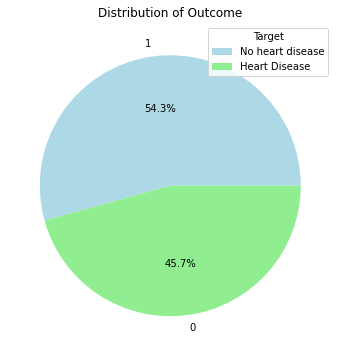

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Outcome')
plt.legend(title='Target', labels={'No heart disease': 0, 'Heart Disease': 1})
plt.show()

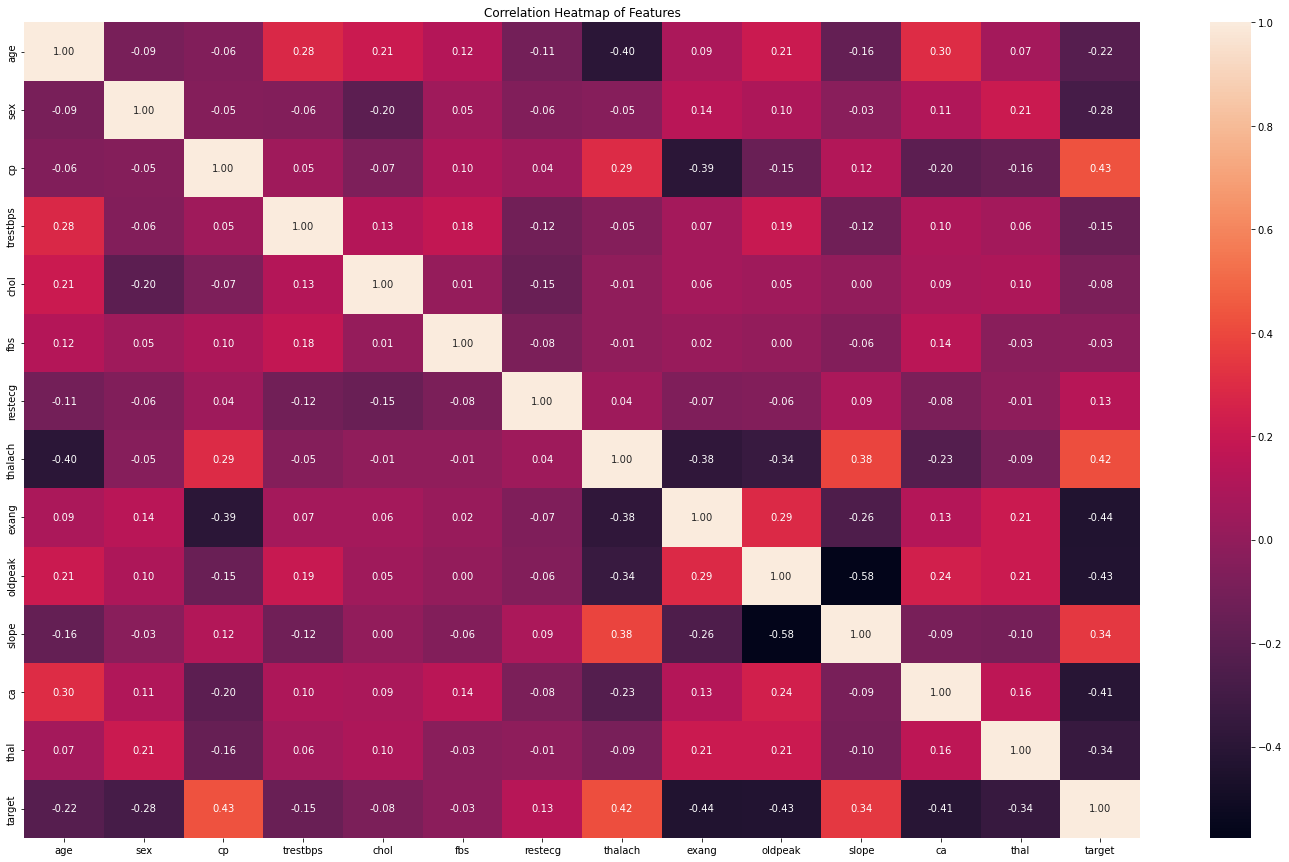

In [16]:
correlation_matrix = heart_data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
mean_values=heart_data.groupby('target').mean()
mean_values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


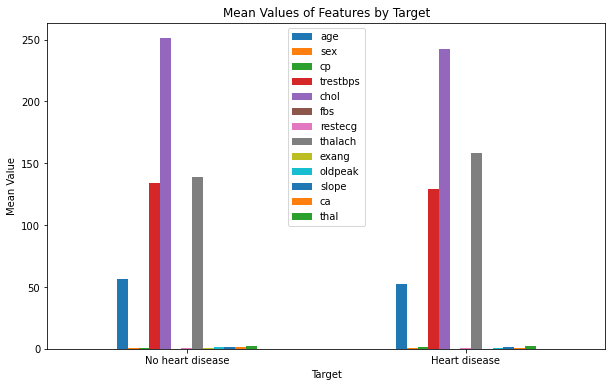

In [18]:
mean_values.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Features by Target')
plt.xlabel('Target')
plt.ylabel('Mean Value')
plt.xticks([0, 1], ['No heart disease', 'Heart disease'], rotation=0)
plt.legend(loc='upper center')
plt.show()

<h4>Insights</h4>

As we mentioned earlier there were two groups which are 0 for no heart disease and 1 for heart disease.

Percentage of people not having a heart disease is: 54.3% (164)

Percentage of people heart disease is: 45.7% (138)

<h2>Data Mining</h2>

<h4>Splitting the Features and Target</h4>

In [19]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [20]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [21]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


<h4>Splitting the Data into Training data & Test Data</h4>

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(302, 13) (241, 13) (61, 13)


<h2>Model Training</h2>

<h4>Logistic Regression</h4>

In [24]:
model = LogisticRegression()

In [25]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

C:\Users\samri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h2>Model Evaluation</h2>

<h4>Confusion Matrix</h4>

In [26]:
X_train_prediction = model.predict(X_train)
conf_matrix = confusion_matrix(Y_train, X_train_prediction)
conf_matrix

array([[ 85,  25],
       [ 11, 120]], dtype=int64)

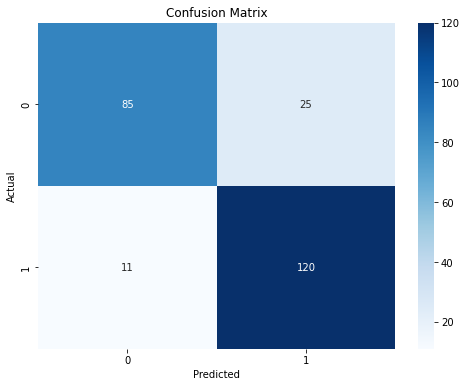

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>Accuracy Score</h4>

In [28]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [29]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8506224066390041


In [30]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


<h4>Precision</h4>

In [32]:
precision_train= precision_score(Y_train, X_train_prediction)

In [33]:
print('Precision score of the training data : ', precision_train)

Precision score of the training data :  0.8275862068965517


In [34]:
precision_test= precision_score(Y_test, X_test_prediction)

In [35]:
print('Precision score of the test data : ', precision_test)

Precision score of the test data :  0.84375


<h4>Recall</h4>

In [36]:
recall_train= recall_score(Y_train, X_train_prediction)

In [37]:
print('Recall score of the training data : ', recall_train)

Recall score of the training data :  0.916030534351145


In [38]:
recall_test= recall_score(Y_test, X_test_prediction)

In [39]:
print('Recall score of the test data : ', recall_test)

Recall score of the test data :  0.8181818181818182


<h4>F1 Score</h4>

In [40]:
f1_train= f1_score(Y_train, X_train_prediction)

In [41]:
print('F1 score of the training data : ', f1_train)

F1 score of the training data :  0.8695652173913042


In [42]:
f1_test= f1_score(Y_test, X_test_prediction)

In [43]:
print('F1 score of the test data : ', f1_test)

F1 score of the test data :  0.8307692307692308


<h4> Visualising Model Evaluation</h4>

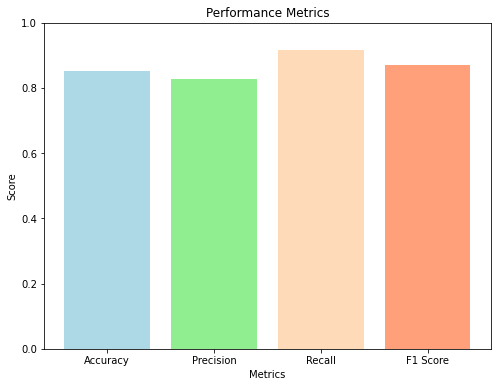

In [44]:
light_blue = '#ADD8E6'
light_green = '#90EE90'
light_orange = '#FFDAB9'
light_red = '#FFA07A'
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [training_data_accuracy, precision_train, recall_train, f1_train]
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=[light_blue, light_green, light_orange, light_red])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1
plt.show()

<h4>Insights</h4>

We used the **confusion matrix** to assess our model's performance, determining **accuracy, precision, recall, and F1 score**.

The Accuracy Score of the model is 0.8506224066390041.

The Precision Score of the model is 0.8275862068965517.

The Recall Score of the model is 0.916030534351145.

The F1 Score of the model is 0.8695652173913042.

<h2>Building a Predictive System</h2>

In [45]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\samri\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<h4>Saving the trained model</h4>

In [46]:
import pickle

In [47]:
filename = 'heart_disease_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [48]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [49]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
